In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering

In [111]:
math = pd.read_csv('data/student-mat.csv')
port = pd.read_csv('data/student-por.csv')
data = pd.concat([math, port]).reset_index().drop(columns=['index'])

#More than 3 family size feature
data['gt3_famsize'] = data['famsize'].map({'GT3': 1, 'LE3': 0})
data = data.drop(columns=['famsize'])

In [112]:
def map_binary(val):
    return 1 if (val == 'yes') else 0

cols_to_map = ['schoolsup', 'famsup', 'romantic', 'paid', 'activities', 'nursery', 'higher', 'internet']

data[cols_to_map] = data[cols_to_map].applymap(map_binary)

In [113]:
#Parents living together feature
data['Pstatus'] = data['Pstatus'].map({'A': 0, 'T': 1})

#Living in a city feature
data['urbanite'] = data['address'].map({'U': 1, 'R': 0})
data = data.drop(columns=['address'])

pd.set_option('display.max_columns', None)  # or 1000
display(data)

,school,sex,age,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gt3_famsize,urbanite
0,GP,F,18,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1,1
1,GP,F,17,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,1
2,GP,F,15,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,0,1
3,GP,F,15,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1,1
4,GP,F,16,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,1,2,3,services,other,course,mother,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11,10,1,0
1040,MS,F,18,1,3,1,teacher,services,course,mother,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15,16,0,1
1041,MS,F,18,1,1,1,other,other,course,mother,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12,9,1,1
1042,MS,M,17,1,3,1,services,services,course,mother,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,10,0,1


# Visualisation of some stats

### Female and male count

F    591
M    453
Name: sex, dtype: int64


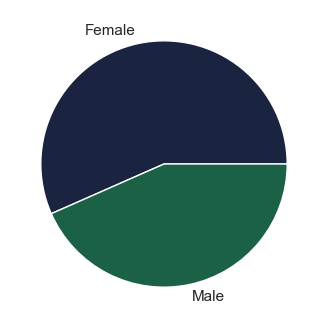

In [117]:
print(data['sex'].value_counts())
sns.set(rc={'figure.figsize':(7, 4)})
plt.pie(data['sex'].value_counts(), colors=sns.color_palette('cubehelix'), labels=['Female', 'Male']);

More females than males

### Ages and sexes countplot

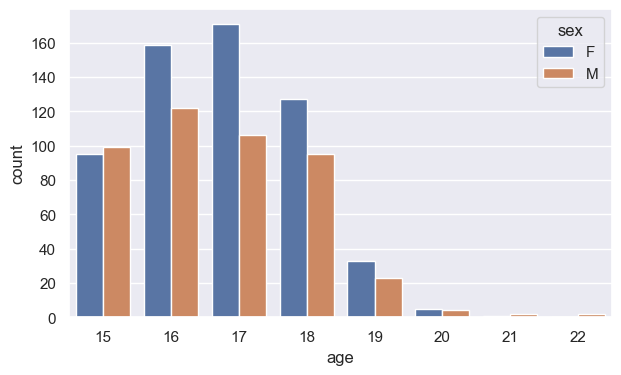

In [118]:
sns.countplot(x='age', hue='sex', data=data);

Much more data about people below age 19

### Alcohol consumption for each gender

In [119]:
data.groupby(['sex'])[['Dalc', 'Walc']].describe()

Dalc                                                Walc            \
     count      mean       std  min  25%  50%  75%  max  count      mean   
sex                                                                        
F    591.0  1.274112  0.637253  1.0  1.0  1.0  1.0  5.0  591.0  1.944162   
M    453.0  1.781457  1.114431  1.0  1.0  1.0  2.0  5.0  453.0  2.728477   

                                        
          std  min  25%  50%  75%  max  
sex                                     
F    1.056984  1.0  1.0  2.0  3.0  5.0  
M    1.415467  1.0  1.0  3.0  4.0  5.0

On average, male individuals consume more alcohol than female ones.
Weekend alcohol consumption on average is more than workdays.

In [ ]:
def plot_bootstrapped_grades(features: pd.Index):
    i = 0
    fig, ax = plt.subplots(1, 3, figsize=(17, 5))
    
    for feature in features.columns:
        samples = [np.random.choice(data[feature], size=50) for _ in range(1000)]
        sns.histplot(samples, ax=ax[i], kde=True)
        i += 1
    
plot_bootstrapped_grades(data[['G1', 'G2', 'G3']])

# Feature correlation heatmap
### Pearson correlation heatmap

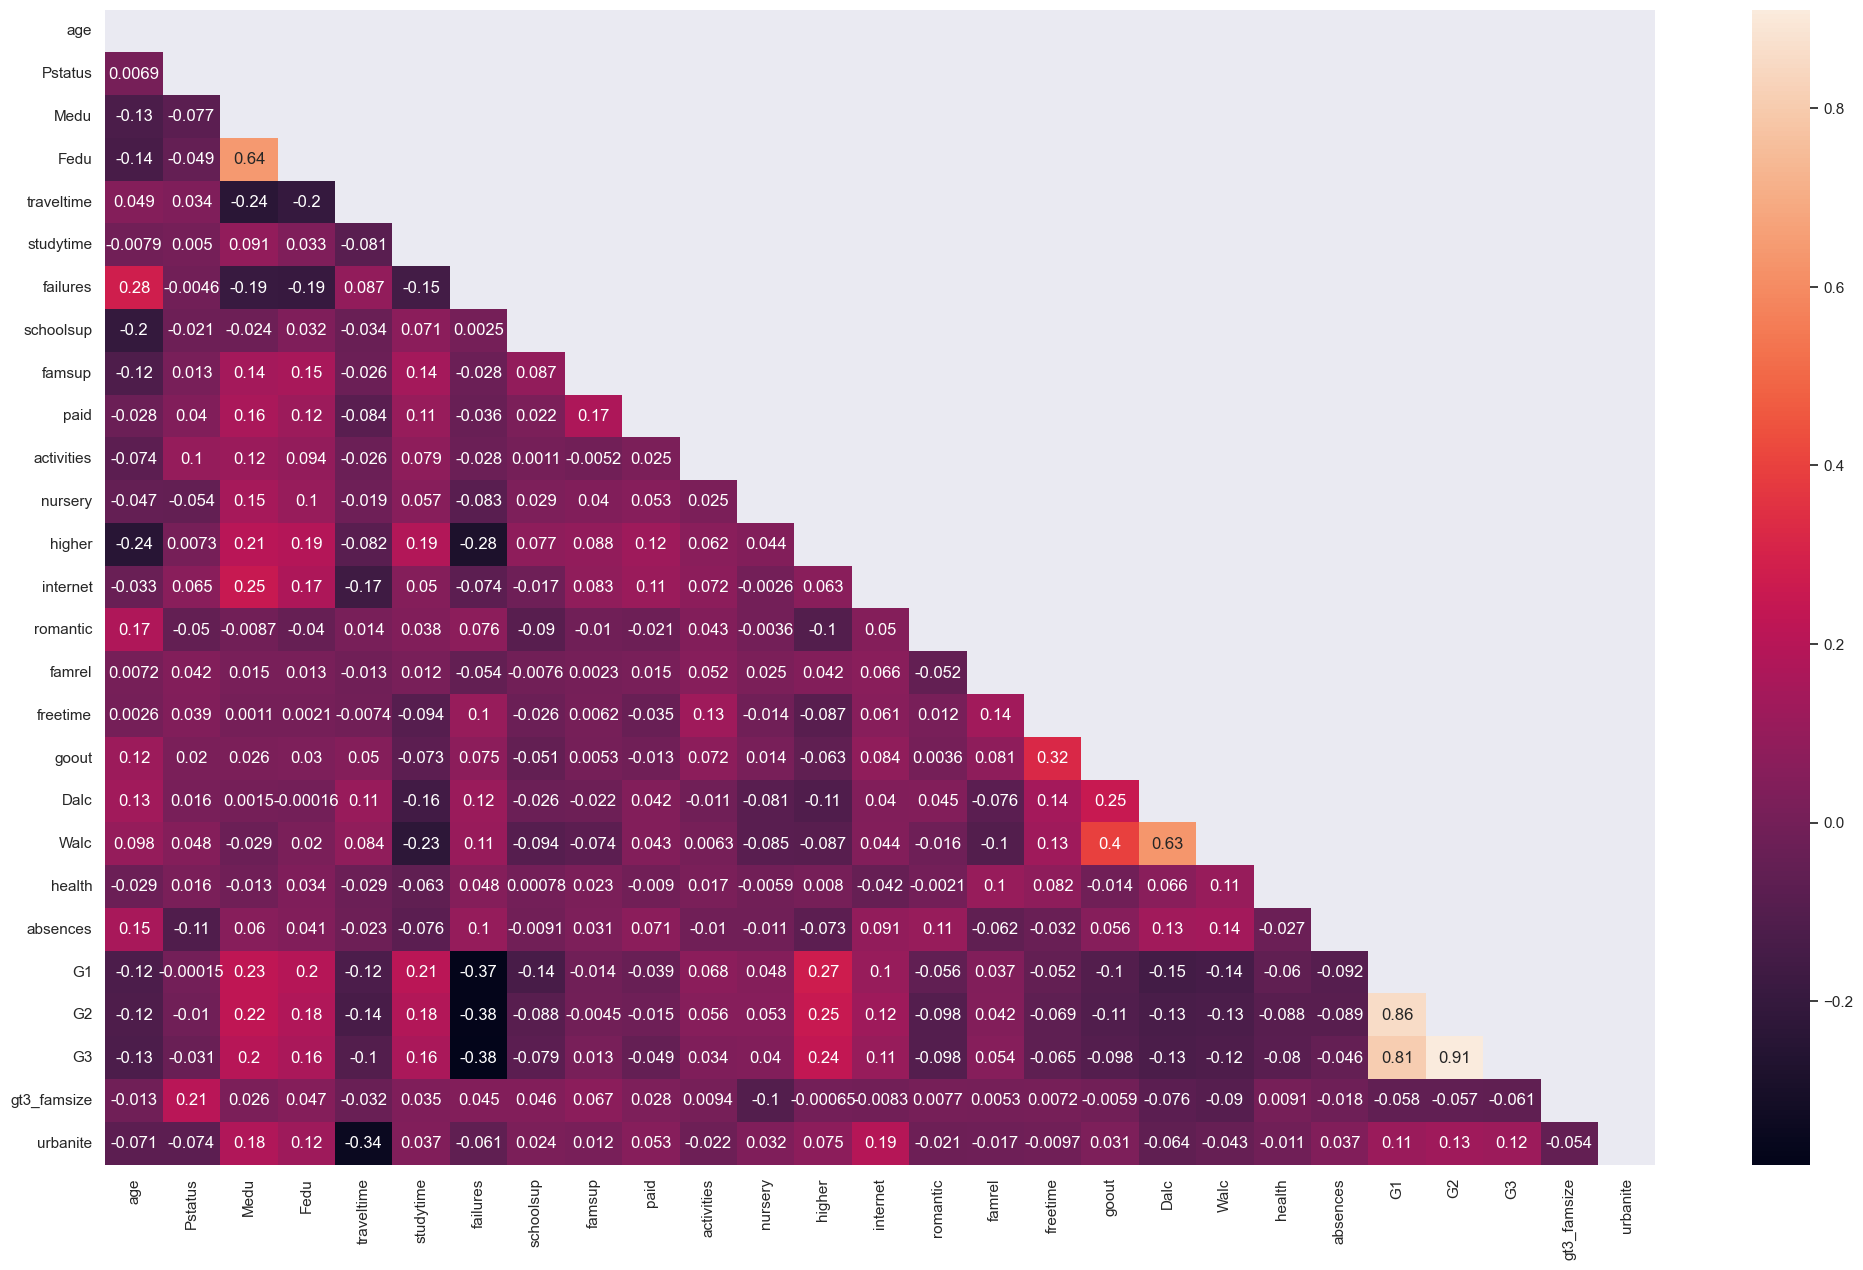

In [125]:
mask = np.zeros_like(data.corr(numeric_only=True))
mask[np.triu_indices_from(mask)] = True
sns.set(rc={'figure.figsize':(25, 15)})
sns.heatmap(data.corr(numeric_only=True, method='pearson'), annot=True, mask=mask);

### Kendall tau correlation heatmap

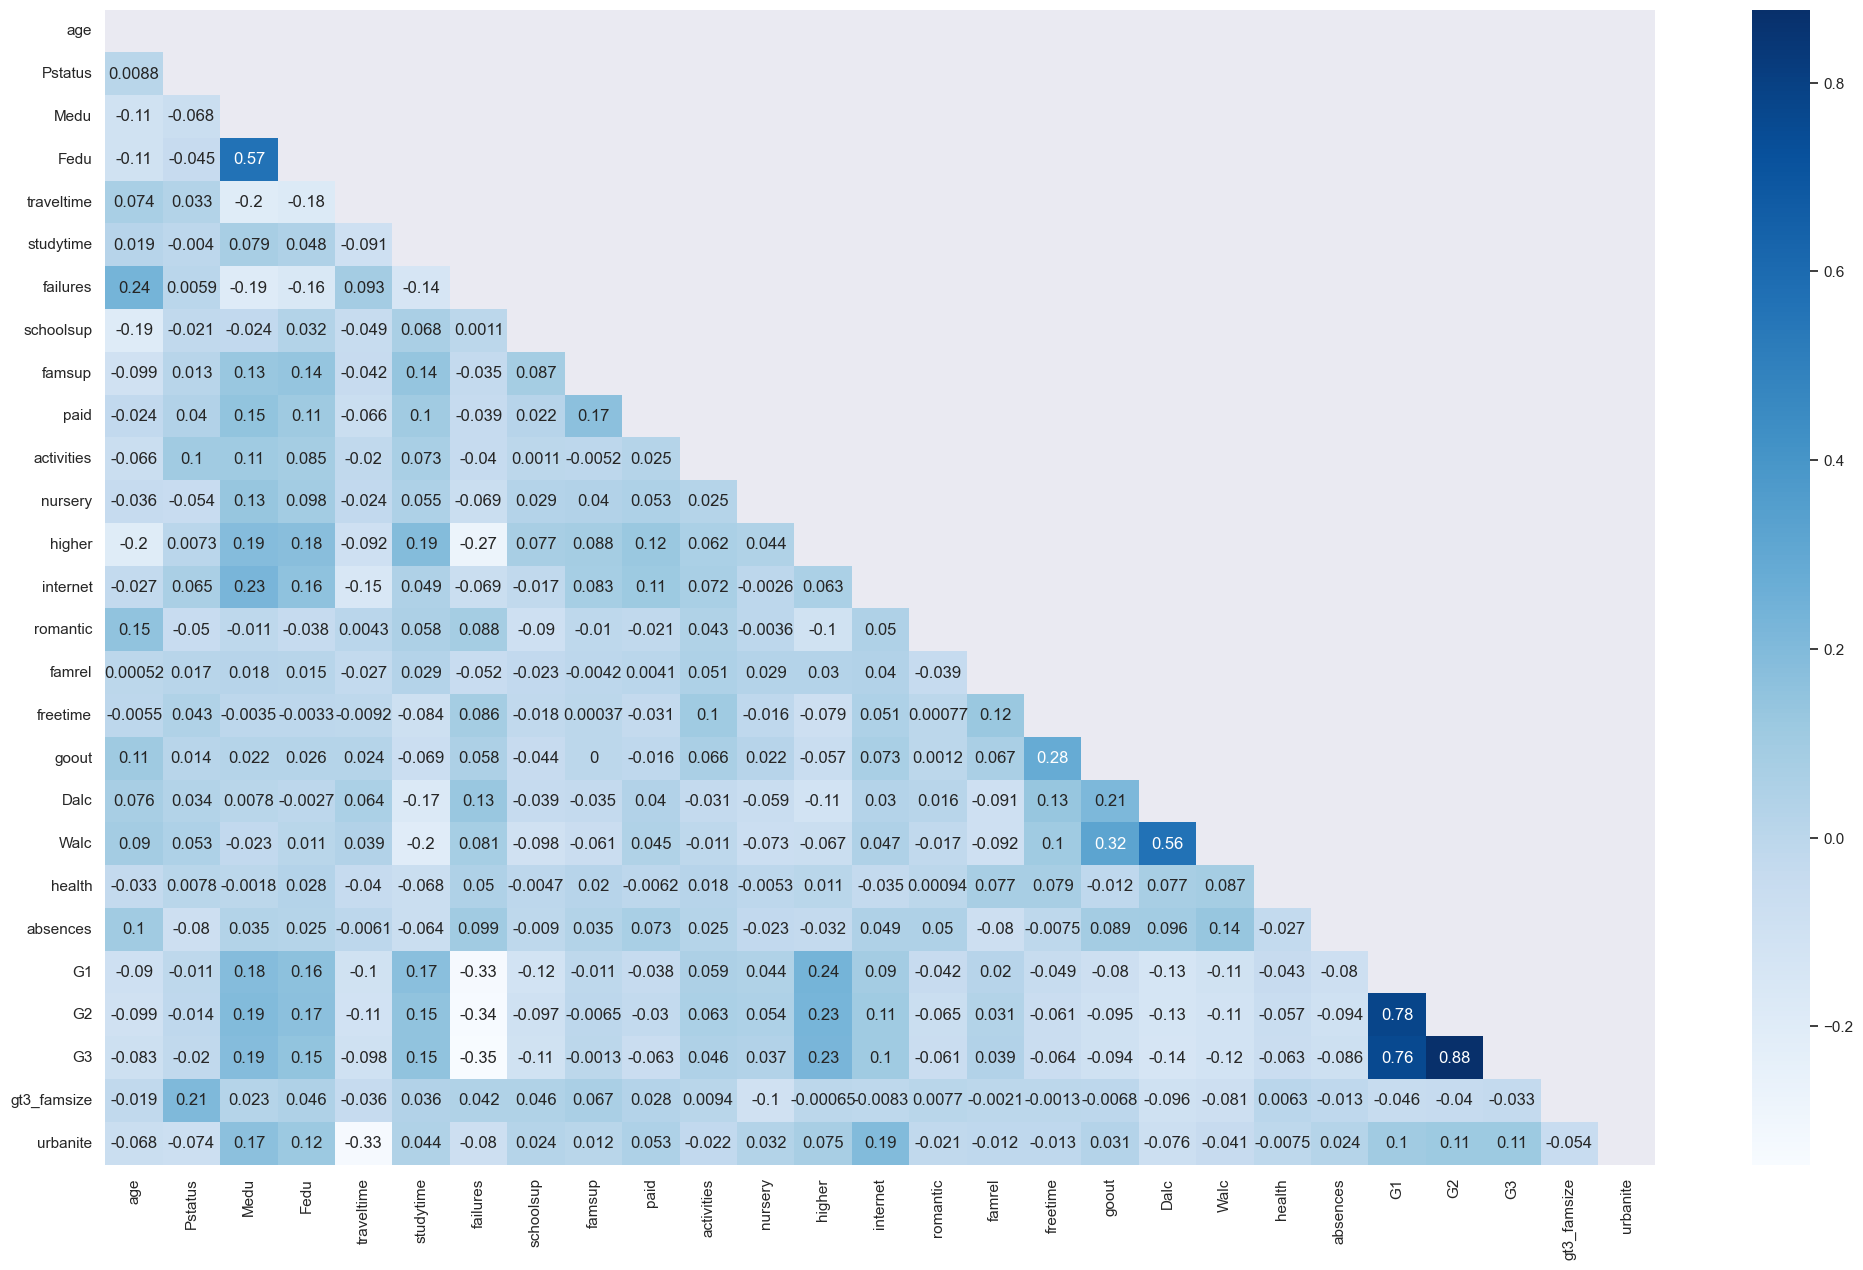

In [126]:
mask = np.zeros_like(data.corr(numeric_only=True))
mask[np.triu_indices_from(mask)] = True
sns.set(rc={'figure.figsize':(25, 15)})
sns.heatmap(data.corr(numeric_only=True, method='kendall'), annot=True, mask=mask, cmap='Blues');

- Academic grades are highly correlated between each other. 
- Alcohol consumption highly depends on how much person goes out, which depends on the free time that individual has.
- Workdays alcohol consumption highly correlates with weekend alcohol consumption, and vice versa.